#Import libraries

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Import dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving preprocessed_df.csv to preprocessed_df (1).csv


#Read the data

In [ ]:
df = pd.read_csv('preprocessed_df.csv')

In [ ]:
df

,Rating,Average Salary,Job Title_analyst,Job Title_data engineer,Job Title_data scientist,Job Title_deep learning engineer,Job Title_director,Job Title_machine learning engineer,Job Title_manager,Job Title_other,...,State_NC,State_NH,State_NJ,State_NM,State_NY,State_OH,State_PA,State_TX,State_VA,State_WI
0,3.5,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,4.5,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3.4,146.0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,3.4,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,2.9,146.0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4886,3.2,51.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4887,4.2,68.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4888,4.0,89.5,0,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
4889,4.0,89.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


#Modeling

In [ ]:
df['Average Salary'].median()

102.0

In [ ]:
df['satisfaction'] = df['Average Salary'].apply(lambda x: 1 if x >= 102 else 0)

In [ ]:
df[['satisfaction', 'Average Salary']]

,satisfaction,Average Salary
0,1,146.0
1,1,146.0
2,1,146.0
3,1,146.0
4,1,146.0
...,...,...
4886,0,51.0
4887,0,68.0
4888,0,89.5
4889,0,89.0


In [ ]:
x = df.drop(columns = ['satisfaction', 'Average Salary'])

In [ ]:
y = df['satisfaction']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 101)

In [ ]:
accu=[]
methods=[]

#Logistic Regression

In [ ]:
logmodel = LogisticRegression()

In [ ]:
logmodel.fit(x_train, y_train)

LogisticRegression()

In [ ]:
prediction = logmodel.predict(x_test)

In [ ]:
prediction

array([0, 1, 0, ..., 0, 1, 0])

In [ ]:
confusion_matrix(y_test, prediction)

array([[517, 205],
       [230, 516]])

In [ ]:
len(y_test)

1468

In [ ]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70       722
           1       0.72      0.69      0.70       746

    accuracy                           0.70      1468
   macro avg       0.70      0.70      0.70      1468
weighted avg       0.70      0.70      0.70      1468



In [ ]:
accuracy_score(y_test, prediction)

0.7036784741144414

In [ ]:
accu.append(logmodel.score(x_test,y_test))
methods.append('logistic regression')
logmodel.score(x_test,y_test)

0.7036784741144414

#KNN

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
prediction_knn = knn.predict(x_test)

In [ ]:
prediction_knn

array([1, 1, 1, ..., 0, 1, 1])

In [ ]:
y_test

,satisfaction
3982,0
2777,1
2369,0
4002,0
3907,1
...,...
4514,0
1842,0
2974,0
1775,0


In [ ]:
confusion_matrix(y_test, prediction_knn)

array([[459, 263],
       [251, 495]])

In [ ]:
accuracy_score(y_test, prediction_knn)

0.6498637602179836

In [ ]:
print(classification_report(y_test, prediction_knn))

              precision    recall  f1-score   support

           0       0.65      0.64      0.64       722
           1       0.65      0.66      0.66       746

    accuracy                           0.65      1468
   macro avg       0.65      0.65      0.65      1468
weighted avg       0.65      0.65      0.65      1468



In [ ]:
accu.append(knn.score(x_test,y_test))
methods.append('KNN')
knn.score(x_test,y_test)

0.6498637602179836

#Decision tree

In [ ]:
tree = DecisionTreeClassifier()

In [ ]:
tree.fit(x_train, y_train)

DecisionTreeClassifier()

In [ ]:
predict_tree = tree.predict(x_test)

In [ ]:
predict_tree

array([0, 0, 1, ..., 0, 1, 0])

In [ ]:
y_test

,satisfaction
3982,0
2777,1
2369,0
4002,0
3907,1
...,...
4514,0
1842,0
2974,0
1775,0


In [ ]:
confusion_matrix(y_test, predict_tree)

array([[506, 216],
       [277, 469]])

In [ ]:
accuracy_score(y_test, predict_tree)

0.6641689373297003

In [ ]:
print(classification_report(y_test, predict_tree))

              precision    recall  f1-score   support

           0       0.65      0.70      0.67       722
           1       0.68      0.63      0.66       746

    accuracy                           0.66      1468
   macro avg       0.67      0.66      0.66      1468
weighted avg       0.67      0.66      0.66      1468



In [ ]:
accu.append(tree.score(x_test,y_test))
methods.append('Decision Tree')
tree.score(x_test,y_test)

0.6641689373297003

#Random Forest

In [ ]:
rf = RandomForestClassifier()

In [ ]:
rf.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
rf_predict = rf.predict(x_test)

In [ ]:
rf_predict

array([1, 0, 1, ..., 0, 1, 1])

In [ ]:
y_test

,satisfaction
3982,0
2777,1
2369,0
4002,0
3907,1
...,...
4514,0
1842,0
2974,0
1775,0


In [ ]:
confusion_matrix(y_test, rf_predict)

array([[469, 253],
       [238, 508]])

In [ ]:
accuracy_score(y_test, rf_predict)

0.6655313351498637

In [ ]:
print(classification_report(y_test, rf_predict))

              precision    recall  f1-score   support

           0       0.66      0.65      0.66       722
           1       0.67      0.68      0.67       746

    accuracy                           0.67      1468
   macro avg       0.67      0.67      0.67      1468
weighted avg       0.67      0.67      0.67      1468



In [ ]:
accu.append(rf.score(x_test,y_test))
methods.append('Random Forest')
rf.score(x_test,y_test)

0.6655313351498637

#Finding the best Model

In [ ]:
print(methods)
print(accu)

['logistic regression', 'KNN', 'Decision Tree', 'Random Forest']
[0.7036784741144414, 0.6498637602179836, 0.6641689373297003, 0.6655313351498637]


In [ ]:
import matplotlib.pyplot as plt

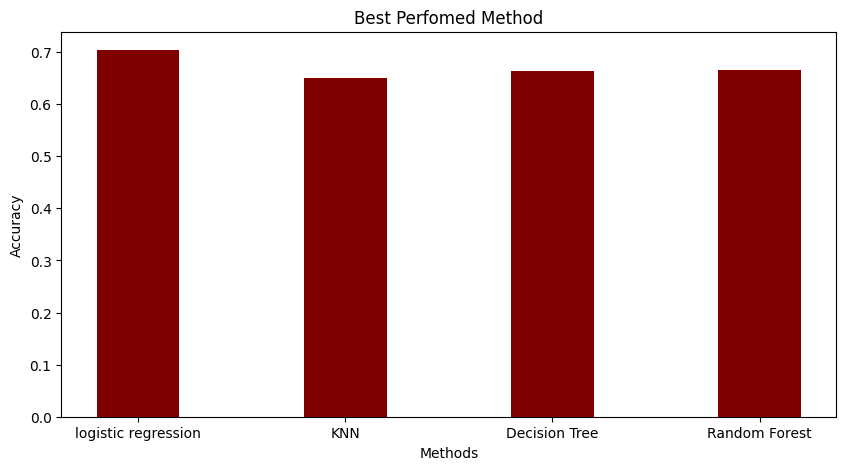

In [ ]:
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(methods, accu, color ='maroon',
        width = 0.4)

plt.xlabel("Methods")
plt.ylabel("Accuracy")
plt.title("Best Perfomed Method")
plt.show()